<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/data_augmentation_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DATA AUGMENTATION

1.IMAGE AUGMENTATION

2939608/2939608 [==============================] - 0s 0us/step


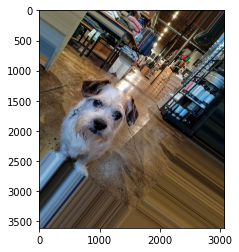

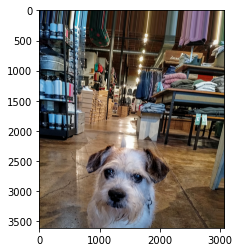

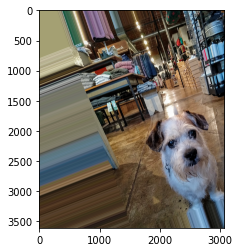

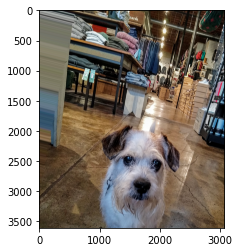

In [ ]:
from keras.preprocessing import image
from keras import utils
import matplotlib.pyplot as plt
from sys import path

base_dir = path[0]+ "/"

# Initialise data generator with augmentation features
train_datagen = image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

img_path = utils.get_file(
    "1ao7lQl.jpeg", "https://i.imgur.com/1ao7lQl.jpeg"
)

img = utils.load_img(img_path)

x = utils.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

# Show image transformation
for batch in train_datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(utils.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [ ]:
# Final train data generator from directory to use with model.fit()
train_generator = train_datagen.flow_from_directory(
    "/dir/example/", target_size=(150, 150), batch_size=32, class_mode="binary"
)

2.IMAGE AUGMENTATION ATTACHED TO MODEL

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, applications
from tensorflow.keras.layers.experimental import preprocessing

# We use imagenet weights
# We keep only the convnets part
# Top denses layers are not included
conv_base = applications.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


# freeze trainable ability of base model
conv_base.trainable = False

model = keras.Sequential([
    
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    preprocessing.RandomContrast(0.5), # contrast change by up to 50%
    # preprocessing.RandomFlip(mode='vertical'), # meaning, top-to-bottom
    # preprocessing.RandomWidth(factor=0.15), # horizontal stretch
    # preprocessing.RandomRotation(factor=0.20),
    # preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),

    # Base
    conv_base,
    
    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])